In [18]:
#To check the downsampling error
#calculate the Mean Square Error (MSE) for different sampling rates after downsampling, 
#and then compare them using a graph


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.fft import fft, ifft

#Load the csv file and use only one sensor data to downasmaple and chek the 
file_path = '/Users/thomas/Desktop/phd_unipv/Industrial_PhD/Technical_documentation/20240707/csv_acc/VI09_2024-07-07_00-00-00_gg-44_int-1_th.csv'

original_df = pd.read_csv(file_path, sep=';')

original_df['time'] = pd.to_datetime(original_df['time'], format='%Y/%m/%d %H:%M:%S:%f')

#original_df = original_df.set_index('time')


In [2]:
original_df.head()


,time,03067802_z,03067806_z,03067807_z,03067809_z,0306780C_z,0306780D_z,0306781A_z,03067820_z,03067826_z,...,03067A79_z,03067A7D_z,03067AB3_z,03067AB4_z,03067AB8_z,03067AB9_z,0306807F_z,030680B5_z,030680D0_z,03068174_z
0,2024-07-07 00:00:00.000,1.006763,1.009129,1.010325,0.994311,1.007919,0.993591,0.996324,1.003928,1.003729,...,0.994685,1.010029,1.002448,1.012507,1.011470,1.000152,-1.040874,-1.014455,-1.008607,-1.024651
1,2024-07-07 00:00:00.005,1.008760,1.009358,1.011101,0.994628,1.008469,0.993797,0.996141,1.003996,1.004083,...,0.995447,1.010157,1.002559,1.012712,1.011569,1.000090,-1.041177,-1.014905,-1.008655,-1.024793
2,2024-07-07 00:00:00.010,1.009201,1.009518,1.011387,0.994738,1.008555,0.994666,0.996681,1.003777,1.004308,...,0.995483,1.010396,1.002270,1.012904,1.011641,1.000080,-1.041592,-1.014839,-1.009076,-1.025000
3,2024-07-07 00:00:00.015,1.008846,1.009591,1.010432,0.994265,1.008145,0.993701,0.996266,1.003587,1.003767,...,0.995157,1.010146,1.002467,1.012948,1.011319,1.000456,-1.041261,-1.014405,-1.008697,-1.024895
4,2024-07-07 00:00:00.020,1.007690,1.009600,1.010724,0.994224,1.008370,0.993156,0.995742,1.003577,1.003565,...,0.995126,1.009822,1.001887,1.012772,1.011302,0.999488,-1.041151,-1.014162,-1.008556,-1.024855


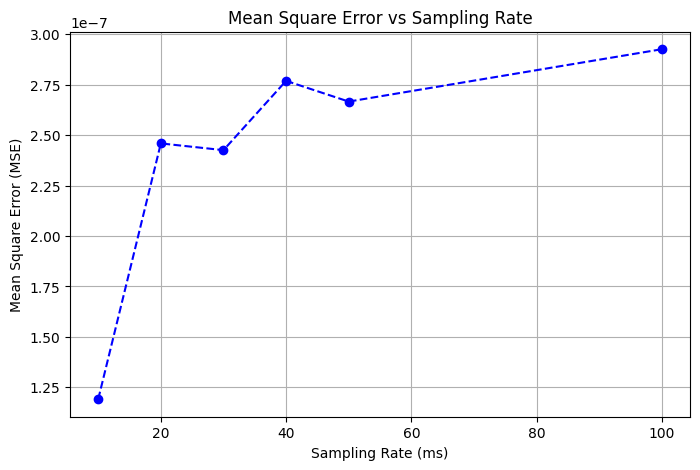

[1.1911111019539265e-07, 2.458998845406036e-07, 2.425625870910307e-07, 2.76906831912999e-07, 2.6663757830944465e-07, 2.9258461356639695e-07]
Sampling Rate: 10 ms, MSE: 0.00000012
Sampling Rate: 20 ms, MSE: 0.00000025
Sampling Rate: 30 ms, MSE: 0.00000024
Sampling Rate: 40 ms, MSE: 0.00000028
Sampling Rate: 50 ms, MSE: 0.00000027
Sampling Rate: 100 ms, MSE: 0.00000029


In [11]:

# Define sampling rates to test (in milliseconds)
sampling_rates_ms = [10, 20, 30, 40, 50, 100]  # Downsample to 10ms, 20ms, 50ms, and 100ms
mse_values = []

# Interpolate the original signal for comparison
original_time = original_df['time']
original_values = original_df['03067802_z']

for rate_ms in sampling_rates_ms:
    # Downsample the signal
    downsampled_time = original_time[::rate_ms // 5]
    downsampled_values = original_values[::rate_ms // 5]

    # Interpolate the downsampled signal back to the original time resolution
    interpolator = interp1d(downsampled_time.astype(np.int64), downsampled_values, kind='linear', fill_value="extrapolate")
    interpolated_values = interpolator(original_time.astype(np.int64))

    # Calculate Mean Square Error (MSE)
    mse = np.mean((original_values - interpolated_values) ** 2)
    mse_values.append(mse)

# Plot the MSE against sampling rates
plt.figure(figsize=(8, 5))
plt.plot(sampling_rates_ms, mse_values, marker='o', linestyle='--', color='b')
plt.title("Mean Square Error vs Sampling Rate")
plt.xlabel("Sampling Rate (ms)")
plt.ylabel("Mean Square Error (MSE)")
plt.grid()
plt.show()


print(mse_values)
# Print MSE values for reference
for rate, mse in zip(sampling_rates_ms, mse_values):
    print(f"Sampling Rate: {rate} ms, MSE: {mse:.8f}")

In [4]:
variance = np.var(original_values)
nmse_values = [mse / variance for mse in mse_values]

In [5]:
for rate, mse in zip(sampling_rates_ms, mse_values):
    print(f"Sampling Rate: {rate} ms, MSE: {mse:.8f}")

Sampling Rate: 10 ms, MSE: 0.00000012
Sampling Rate: 20 ms, MSE: 0.00000025
Sampling Rate: 30 ms, MSE: 0.00000024
Sampling Rate: 40 ms, MSE: 0.00000028
Sampling Rate: 50 ms, MSE: 0.00000027
Sampling Rate: 100 ms, MSE: 0.00000029
Sampling Rate: 500 ms, MSE: 0.00000036
Sampling Rate: 1000 ms, MSE: 0.00000036


In [6]:
# **Signal-to-Noise Ratio (SNR) Calculation**
signal_power = np.mean(original_values**2)
snr_values = [10 * np.log10(signal_power / mse) for mse in mse_values]

# Print SNR values
for rate, snr in zip(sampling_rates_ms, snr_values):
    print(f"Sampling Rate: {rate} ms, SNR: {snr:.2f} dB")

Sampling Rate: 10 ms, SNR: 69.31 dB
Sampling Rate: 20 ms, SNR: 66.16 dB
Sampling Rate: 30 ms, SNR: 66.22 dB
Sampling Rate: 40 ms, SNR: 65.64 dB
Sampling Rate: 50 ms, SNR: 65.81 dB
Sampling Rate: 100 ms, SNR: 65.40 dB
Sampling Rate: 500 ms, SNR: 64.48 dB
Sampling Rate: 1000 ms, SNR: 64.51 dB


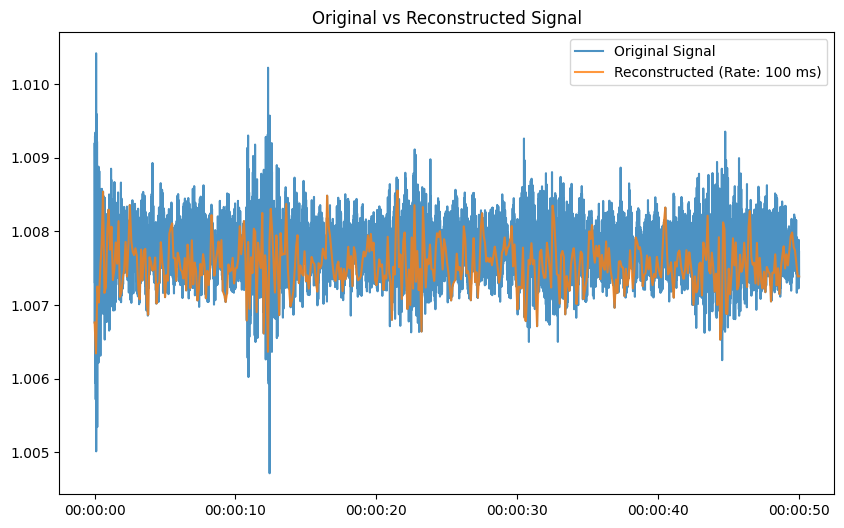

In [15]:
rate_to_visualize = 100 

plt.figure(figsize=(10, 6))
plt.plot(original_time[:10000], original_values[:10000], label='Original Signal', alpha=0.8)
plt.plot(original_time[:10000], interpolated_values[:10000], label=f'Reconstructed (Rate: {rate_to_visualize} ms)', alpha=0.8)
plt.title("Original vs Reconstructed Signal")
plt.legend()
plt.show()



In [8]:
from scipy.fft import fft, ifft



In [20]:
fft_result = fft(original_values.values)


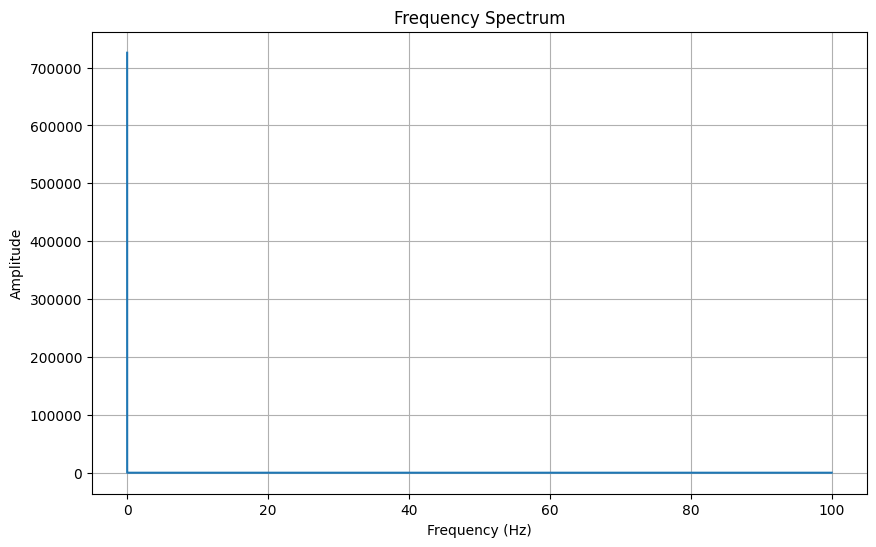

Mean Square Error (MSE): 0.000000


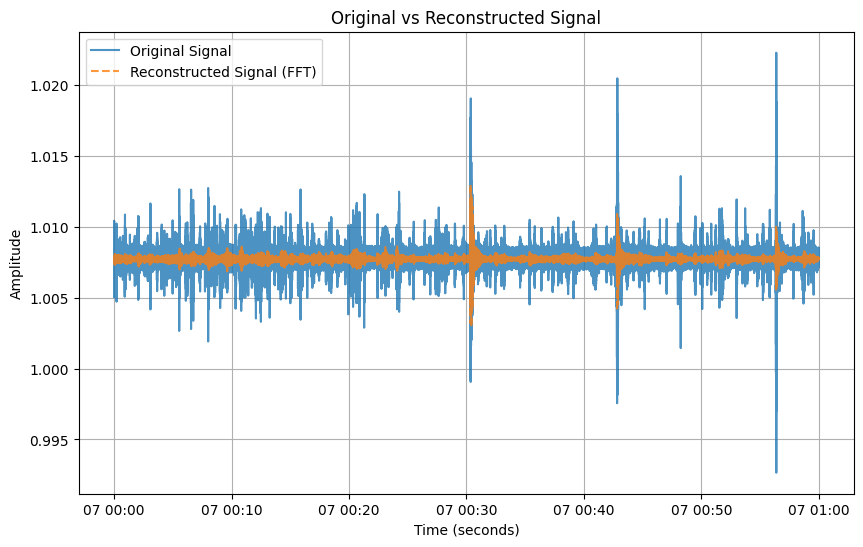

In [23]:
frequencies = np.fft.fftfreq(len(original_values), d=0.005)  # Frequency bins (sampling interval = 5ms)

# Visualize the FFT spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(frequencies) // 2], np.abs(fft_result)[:len(frequencies) // 2])
plt.title("Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# Filter high frequencies (low-pass filter)
threshold_freq = 5  # Set a cutoff frequency (e.g., 10 Hz)
filtered_fft = fft_result.copy()
filtered_fft[np.abs(frequencies) > threshold_freq] = 0  # Zero out frequencies above threshold

# Perform Inverse FFT to reconstruct the signal
reconstructed_signal = ifft(filtered_fft).real

# Calculate MSE between original and reconstructed signal
mse = np.mean((original_values - reconstructed_signal) ** 2)
print(f"Mean Square Error (MSE): {mse:.6f}")

# Visualize the original and reconstructed signals
plt.figure(figsize=(10, 6))
plt.plot(original_time, original_values, label='Original Signal', alpha=0.8)
plt.plot(original_time, reconstructed_signal, label='Reconstructed Signal (FFT)', linestyle='--', alpha=0.8)
plt.title("Original vs Reconstructed Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()